Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading datasets

In [2]:
holiday_events = pd.read_csv("../../Data/Kaggle/StoreSales/holidays_events.csv")
oil = pd.read_csv("../../Data/Kaggle/StoreSales/oil.csv")
sample_submission = pd.read_csv("../../Data/Kaggle/StoreSales/sample_submission.csv")
stores = pd.read_csv("../../Data/Kaggle/StoreSales/stores.csv")
test = pd.read_csv("../../Data/Kaggle/StoreSales/test.csv")
train = pd.read_csv("../../Data/Kaggle/StoreSales/train.csv")
transactions = pd.read_csv("../../Data/Kaggle/StoreSales/transactions.csv")

Checking out dataset content and shape

In [3]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [4]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [6]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [8]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


Converting date feature to datetime data type

In [10]:
holiday_events["date"] = pd.to_datetime(holiday_events.date)
oil["date"] = pd.to_datetime(oil.date)
test["date"] = pd.to_datetime(test.date)
train["date"] = pd.to_datetime(train.date)
transactions["date"] = pd.to_datetime(transactions.date)

Visualising time series data

In [11]:
def plot_series(time, series, format="-", start=0, end=None):
    fig, ax = plt.subplots(figsize=(14,5))
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.grid(True)
    plt.show()
    plt.close()

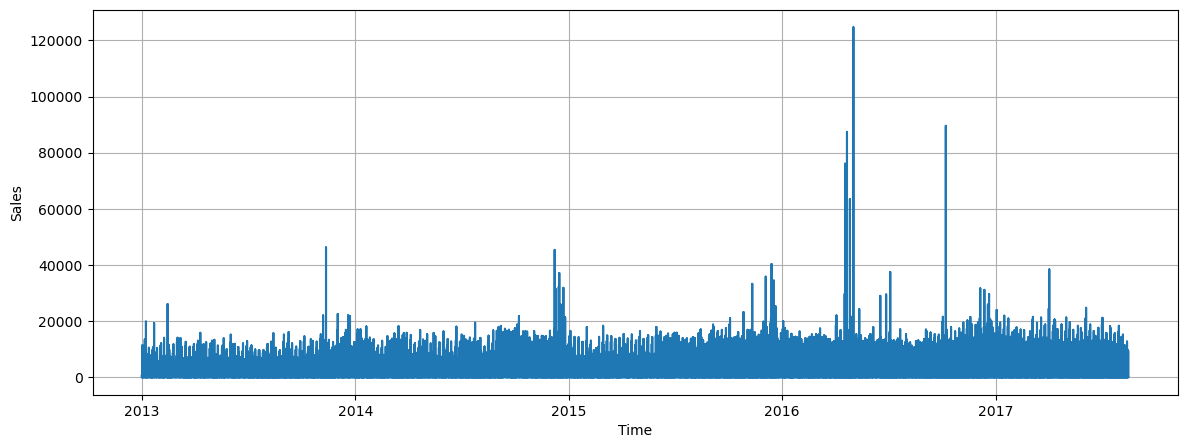

In [12]:
plot_series(train["date"], train["sales"], format="-", start=0, end=None)

Joining holiday_events, oil, and stores with train and test sets

In [13]:
holiday_events = holiday_events.drop_duplicates(subset=['date'], keep='last')

In [14]:
train.shape

(3000888, 6)

In [15]:
train = pd.merge(train,holiday_events,how="left",on='date', validate="many_to_one")

In [16]:
train.shape

(3000888, 11)

In [17]:
train = pd.merge(train,oil,how="left",on='date')

In [18]:
train.shape

(3000888, 12)

In [19]:
train = pd.merge(train,stores,how="left",on="store_nbr",suffixes=("holiday","stores"))

In [20]:
train.shape

(3000888, 16)

In [21]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,typeholiday,locale,locale_name,description,transferred,dcoilwtico,city,state,typestores,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [22]:
test.shape

(28512, 5)

In [23]:
test = pd.merge(test,holiday_events,how="left",on='date', validate="many_to_one")

In [24]:
test.shape

(28512, 10)

In [25]:
test = pd.merge(test,oil,how="left",on='date')

In [26]:
test.shape

(28512, 11)

In [27]:
test = pd.merge(test,stores,how="left",on="store_nbr",suffixes=("holiday","stores"))

In [28]:
test.shape

(28512, 15)

Extracting month and weekday

In [29]:
train['day_of_week'] = train['date'].dt.day_of_week
train['day_of_week'] = train['day_of_week']+1
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

In [30]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,typeholiday,locale,locale_name,description,transferred,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013


In [31]:
test['day_of_week'] = test['date'].dt.day_of_week
test['day_of_week'] = test['day_of_week']+1
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

In [32]:
test.head()

,id,date,store_nbr,family,onpromotion,typeholiday,locale,locale_name,description,transferred,dcoilwtico,city,state,typestores,cluster,day_of_week,month,year
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017


Changing transferred holidays to normal day

In [33]:
display(train["typeholiday"].value_counts(dropna=False))

typeholiday
NaN           2551824
Holiday        263736
Event           98010
Additional      58806
Transfer        16038
Work Day         8910
Bridge           3564
Name: count, dtype: int64

In [34]:
display(train["transferred"].unique())

array([False, nan, True], dtype=object)

In [35]:
train["typeholiday"]=np.where(train["transferred"]==True,'NDay',train["typeholiday"])
train["typeholiday"]=np.where(train["typeholiday"]=='Work Day','NDay',train["typeholiday"])
train["typeholiday"]=train["typeholiday"].fillna("NDay")

In [36]:
display(train["typeholiday"].value_counts(dropna=False))

typeholiday
NDay          2576772
Holiday        247698
Event           98010
Additional      58806
Transfer        16038
Bridge           3564
Name: count, dtype: int64

In [37]:
test["typeholiday"]=np.where(test["transferred"]==True,'NDay',test["typeholiday"])
test["typeholiday"]=np.where(test["typeholiday"]=='Work Day','NDay',test["typeholiday"])
test["typeholiday"]=test["typeholiday"].fillna("NDay")

In [38]:
display(test["typeholiday"].value_counts(dropna=False))

typeholiday
NDay       26730
Holiday     1782
Name: count, dtype: int64

In [39]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,typeholiday,locale,locale_name,description,transferred,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2,1,1,2013


In [40]:
test.head()

,id,date,store_nbr,family,onpromotion,typeholiday,locale,locale_name,description,transferred,dcoilwtico,city,state,typestores,cluster,day_of_week,month,year
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
1,3000889,2017-08-16,1,BABY CARE,0,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
2,3000890,2017-08-16,1,BEAUTY,2,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
3,3000891,2017-08-16,1,BEVERAGES,20,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
4,3000892,2017-08-16,1,BOOKS,0,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017


Fixing  missing values in oil prices

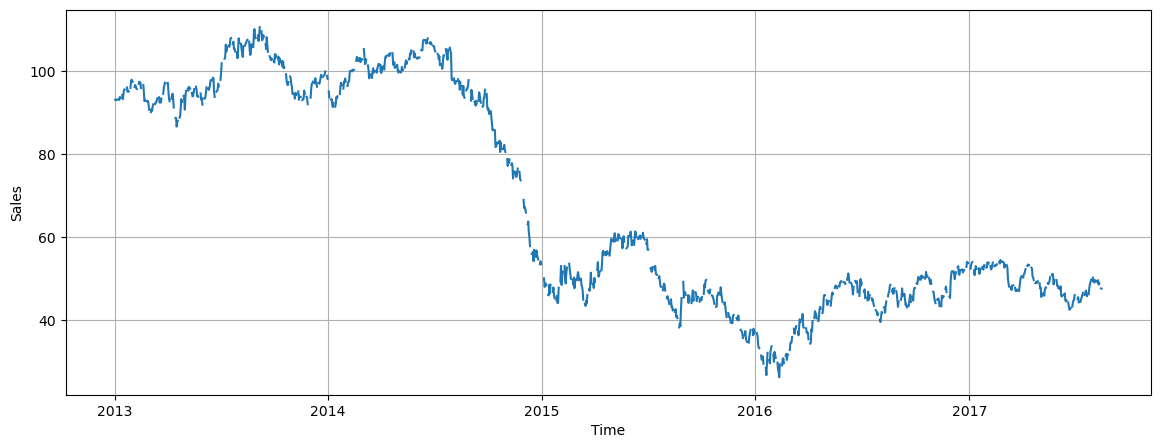

In [41]:
plot_series(train["date"], train["dcoilwtico"], format="-", start=0, end=None)

In [42]:
train.shape

(3000888, 20)

In [43]:
train["dcoilwtico"]=np.where(train["dcoilwtico"] ==0, np.nan, train["dcoilwtico"])
train.dcoilwtico.interpolate(limit_direction='both',inplace=True)

In [44]:
train.shape

(3000888, 20)

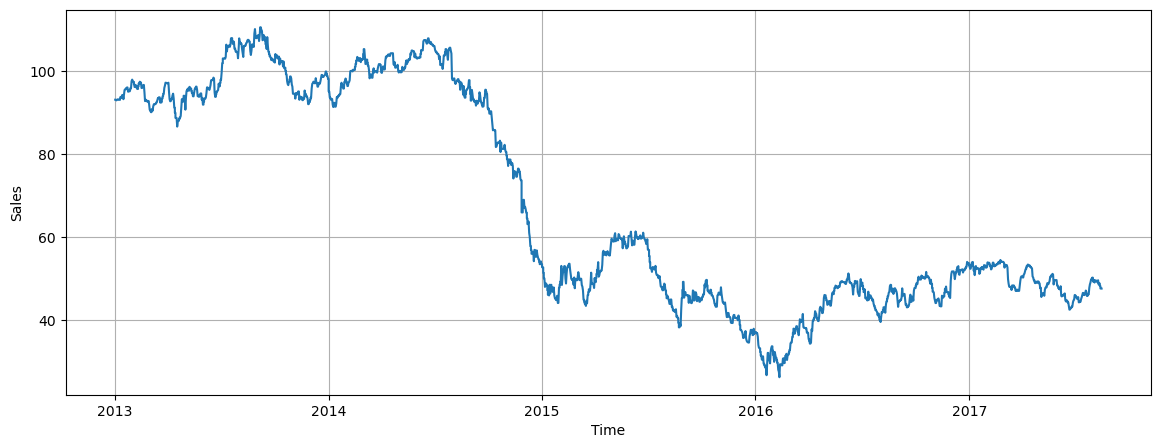

In [45]:
plot_series(train["date"], train["dcoilwtico"], format="-", start=0, end=None)

In [46]:
test.shape

(28512, 18)

In [47]:
test["dcoilwtico"]=np.where(test["dcoilwtico"] ==0, np.nan, test["dcoilwtico"])
test.dcoilwtico.interpolate(limit_direction='both',inplace=True)

In [48]:
test.shape

(28512, 18)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 20 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   typeholiday  object        
 7   locale       object        
 8   locale_name  object        
 9   description  object        
 10  transferred  object        
 11  dcoilwtico   float64       
 12  city         object        
 13  state        object        
 14  typestores   object        
 15  cluster      int64         
 16  day_of_week  int64         
 17  day          int32         
 18  month        int32         
 19  year         int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5), object(9)
memory usage: 423.6+ MB


In [50]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion,typeholiday,locale,locale_name,description,transferred,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Quito,Pichincha,B,6,2,15,8,2017


In [51]:
test.head()

,id,date,store_nbr,family,onpromotion,typeholiday,locale,locale_name,description,transferred,dcoilwtico,city,state,typestores,cluster,day_of_week,month,year
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
1,3000889,2017-08-16,1,BABY CARE,0,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
2,3000890,2017-08-16,1,BEAUTY,2,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
3,3000891,2017-08-16,1,BEVERAGES,20,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017
4,3000892,2017-08-16,1,BOOKS,0,NDay,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,3,8,2017


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   typeholiday  28512 non-null  object        
 6   locale       1782 non-null   object        
 7   locale_name  1782 non-null   object        
 8   description  1782 non-null   object        
 9   transferred  1782 non-null   object        
 10  dcoilwtico   28512 non-null  float64       
 11  city         28512 non-null  object        
 12  state        28512 non-null  object        
 13  typestores   28512 non-null  object        
 14  cluster      28512 non-null  int64         
 15  day_of_week  28512 non-null  int32         
 16  mont

In [53]:
train = train.drop(columns=['id','date','locale','locale_name','description','transferred'])

In [54]:
test = test.drop(columns=['id','date','locale','locale_name','description','transferred'])

In [65]:
train.to_csv('../../Data/Kaggle/StoreSales/new_train.csv', index=False)

In [66]:
test.to_csv('../../Data/Kaggle/StoreSales/new_test.csv', index=False)